In [133]:
#importing packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [134]:
#Downloading the data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-19/technology.csv')

Exploring the data

In [135]:
df.head()

,variable,label,iso3c,year,group,category,value
0,BCG,% children who received a BCG immunization,AFG,1982,Consumption,Vaccines,10.0
1,BCG,% children who received a BCG immunization,AFG,1983,Consumption,Vaccines,10.0
2,BCG,% children who received a BCG immunization,AFG,1984,Consumption,Vaccines,11.0
3,BCG,% children who received a BCG immunization,AFG,1985,Consumption,Vaccines,17.0
4,BCG,% children who received a BCG immunization,AFG,1986,Consumption,Vaccines,18.0


In [136]:
df.dtypes

variable     object
label        object
iso3c        object
year          int64
group        object
category     object
value       float64
dtype: object

In [137]:
df['iso3c'].value_counts()

DNK    6132
FRA    5931
DEU    5836
GBR    5771
SWE    5769
FIN    5730
NOR    5706
ESP    5668
NLD    5656
AUS    5555
ITA    5480
USA    5374
BEL    5233
AUT    5183
CAN    4974
GRC    4890
HUN    4838
PRT    4744
JPN    4677
NZL    4476
TUR    4435
CHE    4381
MEX    4355
CHL    4320
BRA    4287
ARG    4275
IND    4262
IRL    4181
POL    3990
ZAF    3925
PER    3736
KOR    3705
VEN    3666
URY    3637
EGY    3611
COL    3531
IDN    3513
CHN    3462
THA    3442
RUS    3372
ISL    3327
ROU    3326
DZA    3319
IRN    3302
ISR    3291
MYS    3264
PHL    3198
BGR    3195
PAK    3149
ECU    3140
MAR    3109
LKA    3064
GHA    2977
TUN    2938
IRQ    2915
SVK    2843
NGA    2824
SAU    2812
CZE    2812
LUX    2799
CUB    2797
SYR    2776
KEN    2767
PAN    2760
MOZ    2758
HND    2705
SLV    2694
ZWE    2667
PRY    2653
CMR    2645
MDG    2592
TZA    2579
CRI    2573
MUS    2537
GTM    2516
DOM    2491
NIC    2491
BGD    2473
AGO    2427
LBN    2399
COD    2385
BOL    2384
SEN    2366
SVN 

In [138]:
df['category'].value_counts()

Agriculture                    120282
Transport                      112845
Communications                  70858
Energy                          66748
Vaccines                        60863
Industry                        26467
Hospital (non-drug medical)     14677
Other                           12292
Financial                        6604
Name: category, dtype: int64

In [139]:
df['group'].value_counts()

Production     249244
Consumption    173490
Non-Tech        65303
Creation         3599
Name: group, dtype: int64

In [140]:
df['variable'].value_counts()

railline                   12324
elecprod                   12140
ag_land                    11945
aluminum                   11736
araland                    11581
pct_ag_ara_land            11581
telephone_canning_wdi      11143
radio                      10344
vehicle_car                 8646
aviationtkm                 8477
railtkm                     8290
fert_total                  8055
railpkm                     7855
cell_subsc                  7855
vehicle_com                 7851
railp                       7842
electric_gen_capacity       7772
railt                       7712
aviation_pass               7470
telephone                   7297
DPT                         6856
MCV1                        6852
Pol3                        6852
pctimmunizmeas              6852
ag_tractor                  6776
mail                        6270
telegram                    6183
forest                      6130
forest_planted              6130
irrigatedarea               6090
pctirrigat

In [141]:
df['year'].value_counts()

2011    10671
2010    10547
2015    10329
2014    10260
2013    10177
2012    10119
2000     9961
2009     9877
2006     9799
2002     9762
2001     9692
2008     9691
2005     9653
2016     9638
2007     9622
2017     9573
2018     9364
2004     9312
2003     9179
1997     8490
1996     8485
1998     8443
1995     8425
1999     8391
1993     8383
1992     8275
1994     7960
1991     7859
1990     7713
1985     6064
2019     5930
1988     5913
1989     5875
1987     5834
1986     5822
1984     5430
1983     5324
1982     5192
1981     5189
1980     5083
1979     4924
1978     4794
1977     4775
1975     4748
1976     4627
1970     4464
1971     4251
1974     4224
1972     4192
1973     4190
1965     3920
1969     3876
1968     3873
1967     3775
1966     3705
1964     3601
1963     3534
1962     3345
1961     3258
1960     2311
1959     1692
1958     1664
1954     1658
1957     1649
1953     1634
1956     1623
1952     1610
2020     1593
1955     1592
1951     1575
1950     1524
1949  

In [142]:
df.isna().sum()

variable    0
label       0
iso3c       0
year        0
group       0
category    0
value       0
dtype: int64

In [143]:
df[df['variable'] == 'BCG'].head()

,variable,label,iso3c,year,group,category,value
0,BCG,% children who received a BCG immunization,AFG,1982,Consumption,Vaccines,10.0
1,BCG,% children who received a BCG immunization,AFG,1983,Consumption,Vaccines,10.0
2,BCG,% children who received a BCG immunization,AFG,1984,Consumption,Vaccines,11.0
3,BCG,% children who received a BCG immunization,AFG,1985,Consumption,Vaccines,17.0
4,BCG,% children who received a BCG immunization,AFG,1986,Consumption,Vaccines,18.0


This data looks like something that I can use time series forecasting for!

In [144]:
df['label'].value_counts()

Fixed telephone subscriptions                                                                      18440
Geographical/route lengths of line open at the end of the year                                     12324
Gross output of electric energy (TWH)                                                              12140
Land agricultural land area 1000 ha                                                                11945
Aluminum primary production, in metric tons                                                        11736
Land arable land area 1000 ha                                                                      11581
% Arable land share in agricultural land                                                           11581
Radios                                                                                             10344
Passenger car vehicles                                                                              8646
Civil aviation ton-KM of cargo carried                 

There is alot of data that we can try to predict using time series forecasting!

In [145]:
df.shape

(491636, 7)

In [146]:
#Adding a condition to find an interesting label

#This will only show rows where group == production
label_production = pd.DataFrame(df.query("`group` == 'Production'").reset_index()['label'].copy())

#Group by label and shows label name and count
label_count = label_production.groupby('label').agg('size').reset_index().rename(columns={0: "count"})

label_count_sorted = label_count.sort_values('count', ascending=False).reset_index(drop=True)

In [147]:
#This makes it so that I will see all rows and columns when calling the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [148]:
label_count_sorted.head(25)

,label,count
0,Geographical/route lengths of line open at the...,12324
1,Gross output of electric energy (TWH),12140
2,"Aluminum primary production, in metric tons",11736
3,Civil aviation ton-KM of cargo carried,8477
4,Freight carried on railways (excluding livesto...,8290
5,Aggregate kg of fertilizer consumed,8055
6,"Commercial vehicles (bus, taxi)",7851
7,"Electricity Generating Capacity, 1000 kilowatts",7772
8,Metric tons of freight carried on railways (ex...,7712
9,"Air transport, passengers carried",7470


On row 6 I see "Commercial vehicles (bus, taxi)". That would be super interesting to analyse!

In [149]:
#Filtering my dataframe to only show the country USA's data.
vehicle_usa = df[(df['label'] == 'Commercial vehicles (bus, taxi)') & (df['iso3c'] == 'USA')].copy()
vehicle_usa = vehicle_usa[['label', 'year', 'value']].reset_index(drop=True)
vehicle_usa.head()

,label,year,value
0,"Commercial vehicles (bus, taxi)",1904,699.999988
1,"Commercial vehicles (bus, taxi)",1905,1399.999976
2,"Commercial vehicles (bus, taxi)",1906,2200.000048
3,"Commercial vehicles (bus, taxi)",1907,2900.000095
4,"Commercial vehicles (bus, taxi)",1908,4000.000000


In [150]:
vehicle_usa.tail()

,label,year,value
105,"Commercial vehicles (bus, taxi)",2011,121355000.0
106,"Commercial vehicles (bus, taxi)",2012,130595459.0
107,"Commercial vehicles (bus, taxi)",2013,132500723.0
108,"Commercial vehicles (bus, taxi)",2014,137043118.0
109,"Commercial vehicles (bus, taxi)",2015,141872375.0


Lets see how the trend looks visually!

In [151]:
import matplotlib.pyplot as plt

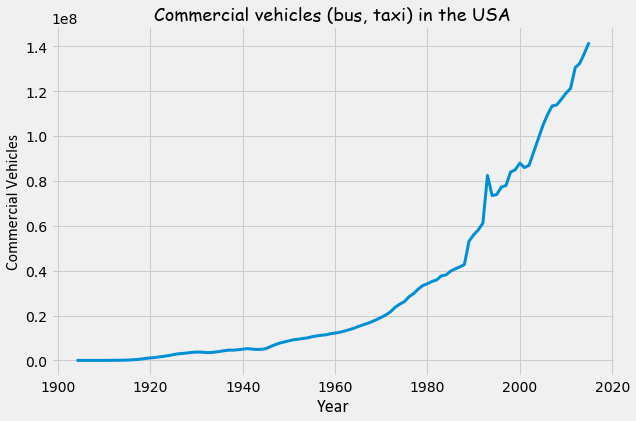

In [152]:
plt.figure(figsize=(9,6))
plt.style.use('fivethirtyeight')
plt.plot(vehicle_usa['year'], vehicle_usa['value'], linewidth=3)
plt.title('Commercial vehicles (bus, taxi) in the USA', fontdict={'fontname': 'Comic Sans ms', 'fontsize': 18})
plt.xlabel('Year', fontdict={'fontname': 'Calibri', 'fontsize': 18})
plt.ylabel('Commercial Vehicles', fontdict={'fontname': 'Calibri', 'fontsize': 16})
plt.show()

This looks like something we could build an regression model for! Even though the long term trend looks exponential. The last 30 years has been linear, which makes sense because what I have learned from Hans Rosling is that population growth follows a S curve, so I think to model an exponential regression would be a mistake here.

In [153]:
vehicle_usa1987 = vehicle_usa[vehicle_usa['year'] >= 1987] #Im choosing 1987 because it looks like its there the linear relationship starts.
vehicle_usa1987.tail()

,label,year,value
105,"Commercial vehicles (bus, taxi)",2011,121355000.0
106,"Commercial vehicles (bus, taxi)",2012,130595459.0
107,"Commercial vehicles (bus, taxi)",2013,132500723.0
108,"Commercial vehicles (bus, taxi)",2014,137043118.0
109,"Commercial vehicles (bus, taxi)",2015,141872375.0


The year 2015 had 142million commercial vehicles. I want to make that number smaller by dividing everything with a million.

In [154]:
vehicle_usa1987['value_in_millions'] = vehicle_usa1987['value']/1000000

In [155]:
vehicle_usa1987.tail()

,label,year,value,value_in_millions
105,"Commercial vehicles (bus, taxi)",2011,121355000.0,121.355000
106,"Commercial vehicles (bus, taxi)",2012,130595459.0,130.595459
107,"Commercial vehicles (bus, taxi)",2013,132500723.0,132.500723
108,"Commercial vehicles (bus, taxi)",2014,137043118.0,137.043118
109,"Commercial vehicles (bus, taxi)",2015,141872375.0,141.872375


In [156]:
vehicle_usa1987.value_in_millions = vehicle_usa1987.value_in_millions.round(2) #Rounding it to only 2 decimals
vehicle_usa1987.tail(20)

,label,year,value,value_in_millions
90,"Commercial vehicles (bus, taxi)",1994,73500000.0,73.50
91,"Commercial vehicles (bus, taxi)",1995,74000000.0,74.00
92,"Commercial vehicles (bus, taxi)",1996,77300000.0,77.30
93,"Commercial vehicles (bus, taxi)",1997,78000000.0,78.00
94,"Commercial vehicles (bus, taxi)",1998,84000000.0,84.00
95,"Commercial vehicles (bus, taxi)",1999,85000000.0,85.00
96,"Commercial vehicles (bus, taxi)",2000,88000000.0,88.00
97,"Commercial vehicles (bus, taxi)",2001,86000000.0,86.00
98,"Commercial vehicles (bus, taxi)",2002,87000000.0,87.00
99,"Commercial vehicles (bus, taxi)",2005,104788000.0,104.79


I can see here that the values for 2003, 2004 and 2005 are missing. It should not matter that much though!

Lets try plotting it again!

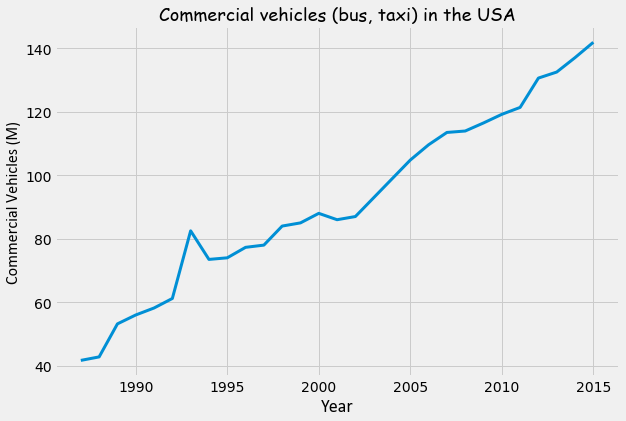

In [157]:
plt.figure(figsize=(9,6))
plt.style.use('fivethirtyeight')
plt.plot(vehicle_usa1987['year'], vehicle_usa1987['value_in_millions'], linewidth=3)
plt.title('Commercial vehicles (bus, taxi) in the USA', fontdict={'fontname': 'Comic Sans ms', 'fontsize': 18})
plt.xlabel('Year', fontdict={'fontname': 'Calibri', 'fontsize': 18})
plt.ylabel('Commercial Vehicles (M)', fontdict={'fontname': 'Calibri', 'fontsize': 16})
plt.show()

Alright! This looks like a situation for linear regression!

In [158]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [159]:
split_year = 2010

train = vehicle_usa1987[vehicle_usa1987.year <= split_year].copy()
test = vehicle_usa1987[vehicle_usa1987.year > split_year].copy()

In [160]:
X_train = pd.DataFrame(train.year) #I need to turn it into a dataframe so sklearn can treat it as a 2d array for the training.
Y_train = train.value_in_millions
X_test = pd.DataFrame(test.year)
Y_test = test.value_in_millions

In [161]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(22, 1) (5, 1) (22,) (5,)


In [162]:
X_train.head()

,year
83,1987
84,1988
85,1989
86,1990
87,1991


In [163]:
X_test.head()

,year
105,2011
106,2012
107,2013
108,2014
109,2015


In [164]:
print(Y_test, Y_train)

105    121.36
106    130.60
107    132.50
108    137.04
109    141.87
Name: value_in_millions, dtype: float64 83      41.70
84      42.80
85      53.20
86      56.00
87      58.20
88      61.20
89      82.50
90      73.50
91      74.00
92      77.30
93      78.00
94      84.00
95      85.00
96      88.00
97      86.00
98      87.00
99     104.79
100    109.60
101    113.48
102    113.93
103    116.47
104    119.18
Name: value_in_millions, dtype: float64


Looks good!

In [165]:
ols_model = reg.fit(X_train, Y_train)

In [166]:
#Display regression coefficients and R-squared value of model
print(ols_model.intercept_, ols_model.coef_, ols_model.score(
    X_train, 
    Y_train)
)

-6337.466167545355 [3.21291502] 0.9585430531896587


Great score!

96% of Y variation can be explained by X

In [167]:
test['prediction'] = ols_model.predict(X_test)
test.head()

,label,year,value,value_in_millions,prediction
105,"Commercial vehicles (bus, taxi)",2011,121355000.0,121.36,123.705945
106,"Commercial vehicles (bus, taxi)",2012,130595459.0,130.60,126.918860
107,"Commercial vehicles (bus, taxi)",2013,132500723.0,132.50,130.131775
108,"Commercial vehicles (bus, taxi)",2014,137043118.0,137.04,133.344690
109,"Commercial vehicles (bus, taxi)",2015,141872375.0,141.87,136.557605


Not bad!

In [168]:
result = pd.concat([train, test])

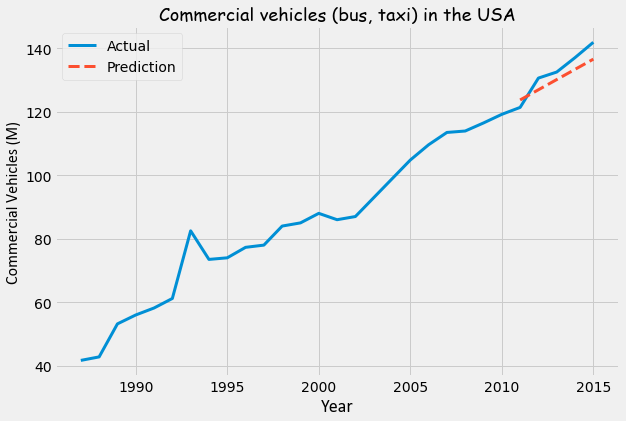

In [169]:
plt.figure(figsize=(9,6))
plt.style.use('fivethirtyeight')
plt.plot(result['year'], result['value_in_millions'], linewidth=3, label='Actual')
plt.plot(result['year'], result['prediction'], linewidth=3, label='Prediction', linestyle='--')
plt.title('Commercial vehicles (bus, taxi) in the USA', fontdict={'fontname': 'Comic Sans ms', 'fontsize': 18})
plt.xlabel('Year', fontdict={'fontname': 'Calibri', 'fontsize': 18})
plt.ylabel('Commercial Vehicles (M)', fontdict={'fontname': 'Calibri', 'fontsize': 16})
plt.legend()
plt.savefig('graph1.png', bbox_inches = 'tight') #bbox_inches fixes image so its not cropped
plt.show()